<a href="https://colab.research.google.com/github/Harsh62004/Summer_School_2022/blob/main/MLSS_22_Day_3_Artificial_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font face="italic" size="10">Introduction to Deep Learning</font>

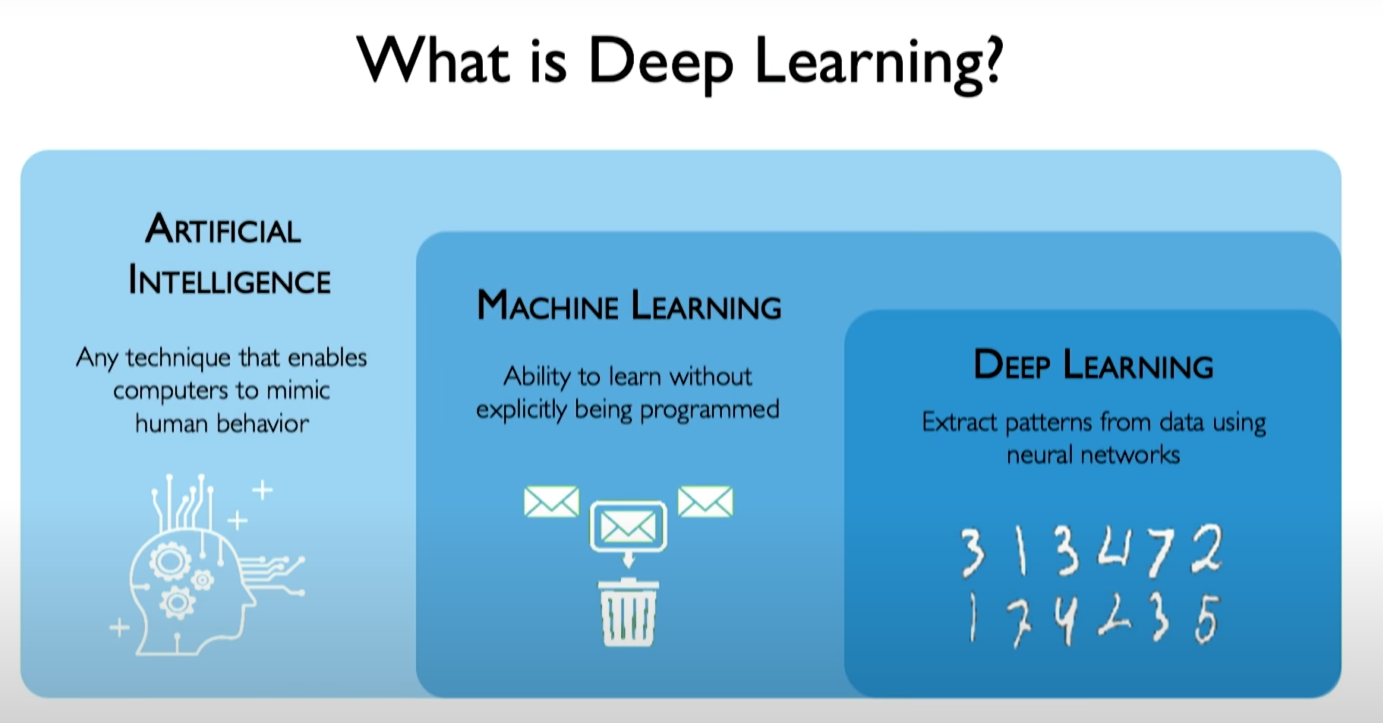

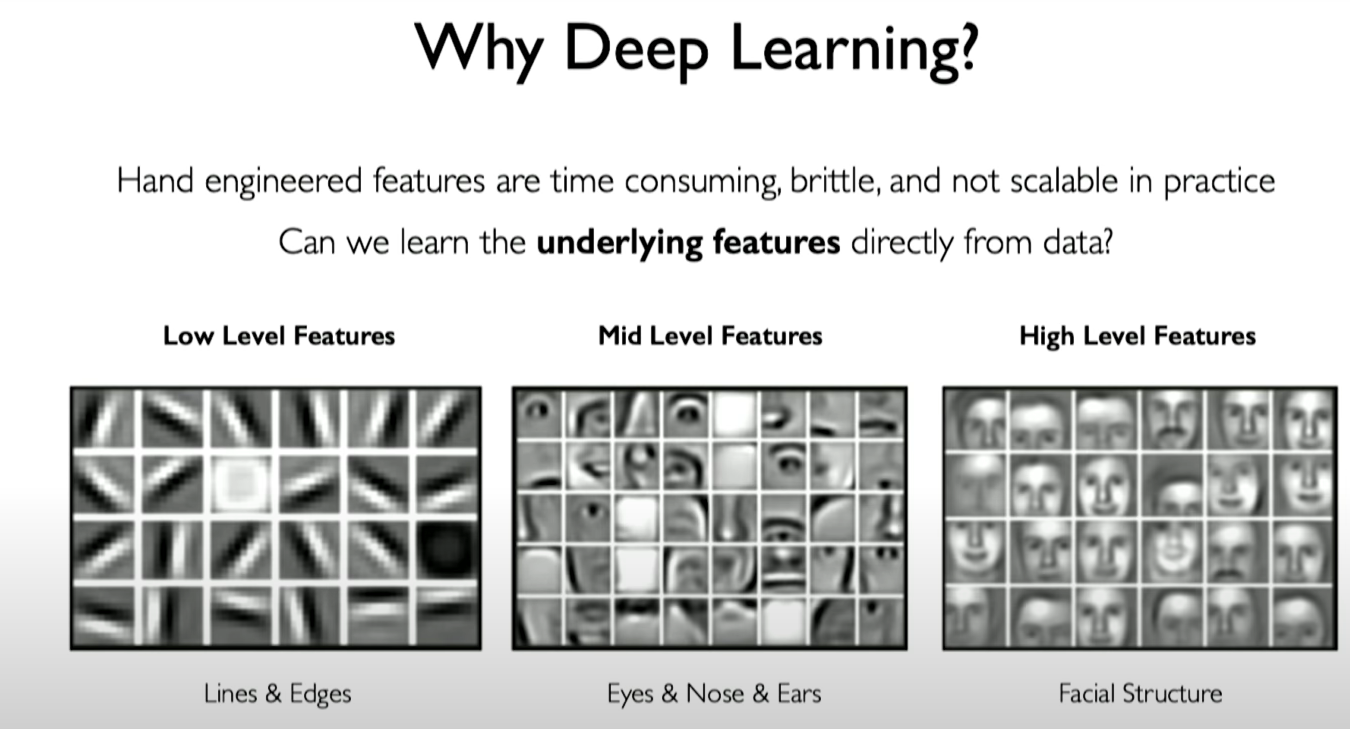

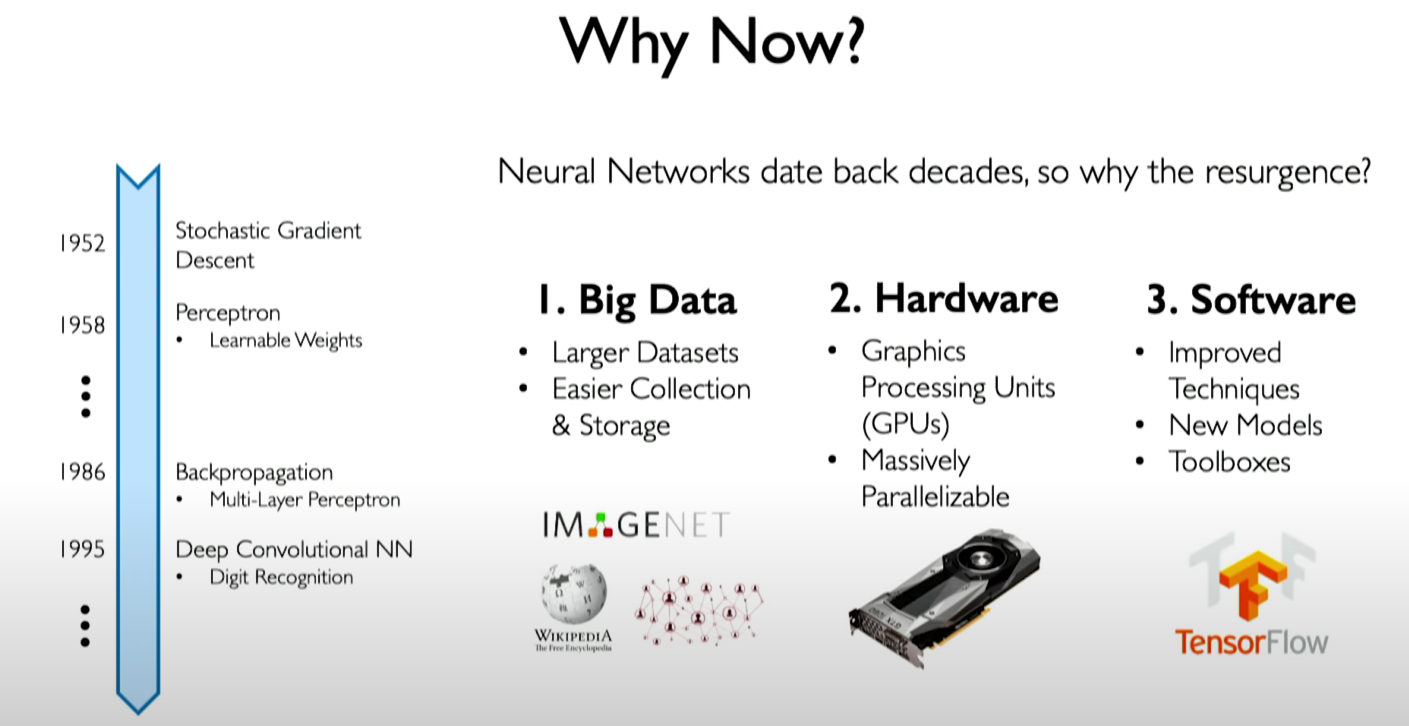

# <font face="italic" size="10">Introduction to Artifical Neural Networks</font>

### Utility Functions

In [3]:
def load_desmos_demo(name:str):
  """Loads desmos demo by name."""

  # imports
  from IPython.display import IFrame

  # Maps demo name to its url
  name_to_url = {
      "AND Gate": "https://www.desmos.com/calculator/e32vao6tpx",
      "OR Gate": "https://www.desmos.com/calculator/ix3kaqalfb",
      "XOR Gate": "https://www.desmos.com/calculator/i3qig75naf",
      "Perceptron Demo": ""
  }

  # Plot desmos dashboard
  return IFrame(src=name_to_url[name], width=1024, height=700)

def load_video(name:str):
  """Loads youtube video by name."""

  # imports
  from IPython.display import YouTubeVideo

  # Maps video name to its id
  name_to_url = {
      "Perceptron Demo": "cNxadbrN_aI"
  }

  # Show video
  return YouTubeVideo(name_to_url[name])

# <font color='#11327a' face="italic" size="10">Biological Inspiration</font> <hr>



*   <h2>Artificial neurons and perceptrons were inspired by the biological processes scientists were able to observe in the brain back in the 50s</h2>
*   <h2>Birds have inspired flight and horses have inspired locomotives and cars, yet none of today’s transportation vehicles resemble metal skeletons of living-breathing-self replicating animals. Still, our limited machines are even more powerful in their own domains (thus, more useful to us humans), than their animal “ancestors” could ever be</h2>
*   <h2>The idea behind perceptrons (the predecessors to artificial neurons) is that it is possible to mimic certain parts of neurons, such as dendrites, cell bodies and axons using simplified mathematical models</h2>
*   <h2>Signals can be received from dendrites, and sent down the axon once enough signals were received. This outgoing signal can then be used as another input for other neurons, repeating the process. Some signals are more important than others and can trigger some neurons to fire easier</h2>

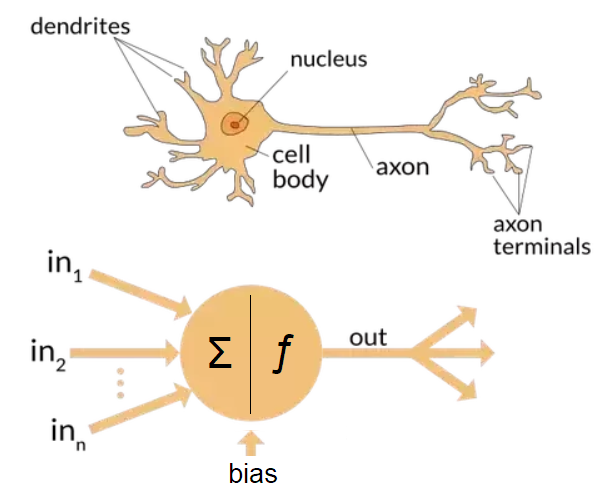

# <font color='#11327a' face="italic" size="10">Perceptrons</font> <hr>


*   <h2> A perceptron takes several binary inputs, $x_1,x_2,\ldots$ and produces a single binary output.</h2>


<center>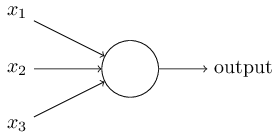</center>

*   <h2>We can use a rule to compute the output.</h2>
*   <h2>Consider $w_1,w_2,\ldots$ real numbers expressing the importance of the respective inputs to the output.</h2>
*   <h2>The neuron's output, 0 or 1, is determined by whether the weighted sum $\sum_j w_j x_j$ is less than or greater than some threshold value.</h2>
*   <h2>To put it in more precise algebraic terms:</h2>

<br>
<h2>
$\begin{eqnarray}
  \mbox{output} & = & \left\{ \begin{array}{ll}
      0 & \mbox{if } \sum_j w_j x_j \leq \mbox{ threshold} \\
      1 & \mbox{if } \sum_j w_j x_j > \mbox{ threshold}
      \end{array} \right.
\tag{1}\end{eqnarray}$
</h2>


## <font color='#264994' face="italic" size="6">Logical Gates</font> <hr>


<h2>Perceptrons can be used to compute the elementary logical functions such as AND, OR, and NAND</h2>

### <font color='#1a996f' face="italic" size="6">AND Gate</font> <hr>


In [4]:
load_desmos_demo("AND Gate")

### <font color='#1a996f' face="italic" size="6">OR Gate</font> <hr>


In [5]:
load_desmos_demo("OR Gate")

### <font color='#1a996f' face="italic" size="6">XOR Gate</font> <hr>


In [6]:
load_desmos_demo("XOR Gate")

### <font color='#1a996f' face="italic" size="6">Perceptron Demo</font> <hr>


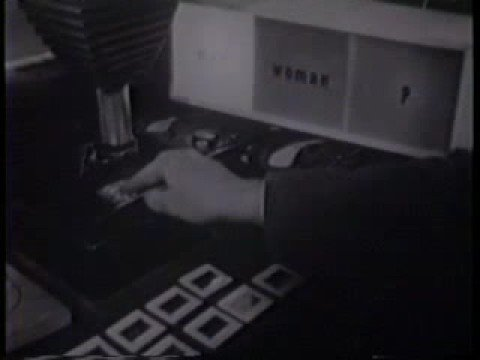

In [7]:
load_video('Perceptron Demo')

# <font color='#11327a' face="italic" size="10">Artifical Neural Networks</font> <hr>


<center>

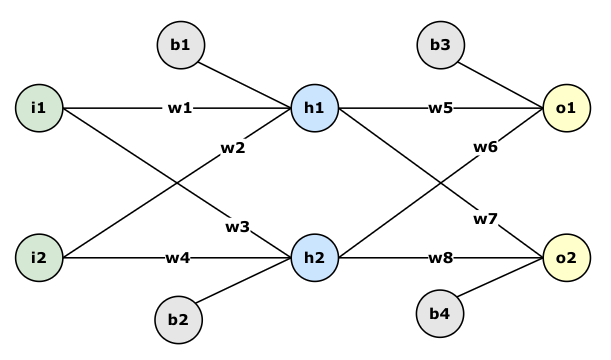

## <font color='#264994' face="italic" size="6">Terminology</font> <hr>





*   <h2><b>Input Layer :</b> The leftmost layer in this network is called the input layer and the neurons within the layer are called input neurons. </h2>
*   <h2><b>Output Layer :</b> The rightmost or output layer contains the output neurons. </h2>
*   <h2><b>Hidden Layer :</b> The middle layer is called a hidden layer, since the neurons in this layer are neither inputs nor outputs. </h2>




## <font color='#264994' face="italic" size="6">Example</font> <hr>





*   <h2><b>Task :</b> Classify digits from input image.</h2>
*   <h2><b>Input :</b> Image with height = 28px and width 28px. Total 784 input neurons.</h2>
*   <h2><b>Output :</b> Probabilities of each digit given input image. Total 10 output neurons. </h2>

<center>

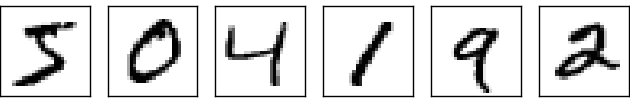

<center>

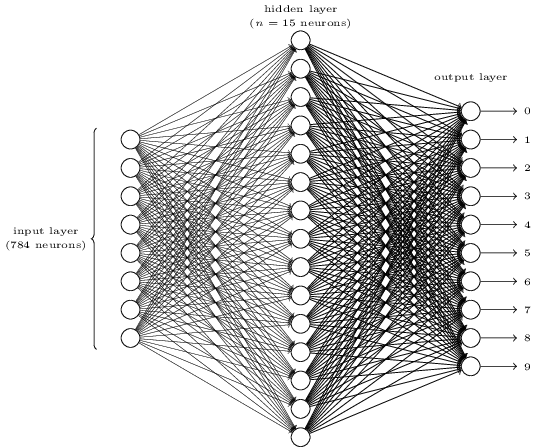

## <font color='#264994' face="italic" size="6">Forward pass</font> <hr>


### <font color='#1a996f' face="italic" size="6">Calculate outputs of hidden layer</font> <hr>


In [8]:
import numpy as np

# model takes two inputs [i1, i2]
inputs = np.array([[0.05, .10]])  # shape: [1, 2]

#------------------------------------------------------------------------------
# Hidden layer
#------------------------------------------------------------------------------

# hidden layer weights [w1, w2]
#                      [w3, w4]
weights_hidden_layer = np.array([[0.15, 0.20],
                                 [0.25, 0.30]])  # shape: [2, 2]

# bias for hidden layer [b1, b2]
biases_hidden_layer = np.array([[0.35, 0.35]])  # shape: [1, 2]

<center>

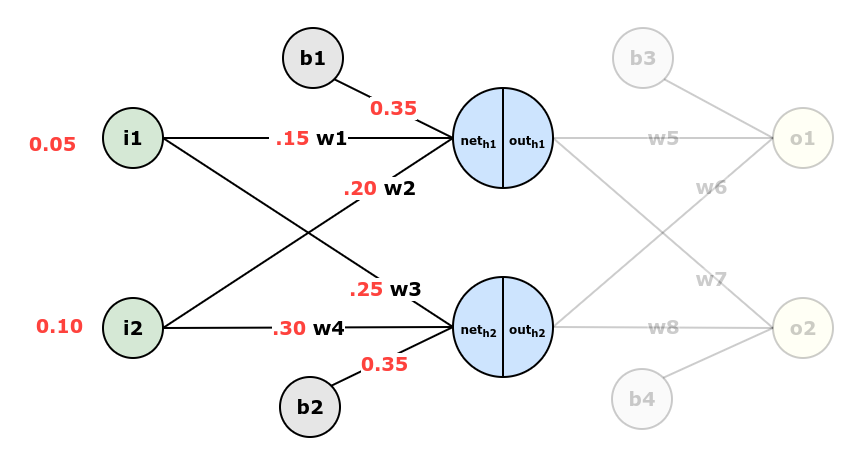

<h2>
$$ net_{h1}=w_1*i_1 + w_2*i_2 + b_1 $$
$$ net_{h2}=w_3*i_1 + w_4*i_2 + b_2 $$
</h2>

In [9]:
def net_output(inputs, weights, biases):
  """
  Use linear equation to calcualte net output
  output = inputs * weights + biases

  Args:
    inputs: Inputs having shape of [1, 2]
    weights: Weight matrix having shape of [2, 2]
    biases: Array of biases having shape of [1, 2]
  Returns:
    Ouput array by multiplying inputs and weights and adding bias
    shape must be [1, 2]
  """
  output = np.dot(inputs, weights.T) + biases
  return output

# net output of hidden layer [net_h1, net_h2]
net_h = net_output(inputs, weights_hidden_layer, biases_hidden_layer)  # shape [1, 2]
assert np.allclose(net_h, np.array([[0.3775, 0.3925]]))

<h2>
$$ out_{h1}=\frac{1}{1+e^{-net_{h1}}} $$
<br>
$$ out_{h2}=\frac{1}{1+e^{-net_{h2}}} $$
</h2>

In [10]:
def sigmoid(net_outputs):
  """
  Apply sigmoid activation functions on each element of net_outputs
  
  Args:
    net_outputs: net outputs of previous linear layer having shape of [1, 2]
  Returns:
    Output after applying sigmoid on net_outputs  [1, 2]
  """
  output = np.divide(1, np.exp(-net_outputs) + 1)
  return output

# output of sigmoid layer [out_h1, out_h2]
out_h = sigmoid(net_h)
assert np.allclose(out_h, np.array([[0.59326999, 0.59688438]]))  # shape [1, 2]

### <font color='#1a996f' face="italic" size="6">Calculate outputs of output layer</font> <hr>


<center>

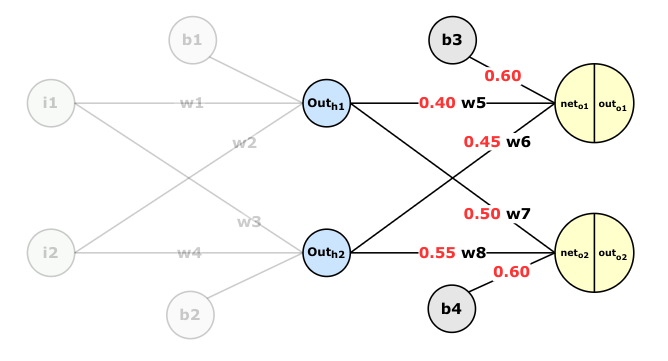

In [11]:
# output layer weights [w5, w6]
#                      [w7, w8]
weights_output_layer = np.array([[0.40, 0.45], [0.50, 0.55]])  # shape: [2, 2]

# bias for output layer
biases_output_layer = np.array([[0.60, 0.60]])   # shape: [1, 2]

<h2>
$$ net_{o1}=w_5*out_{h1} + w_6*out_{h2} + b_3 $$
$$ net_{o2}=w_7*out_{h1} + w_8*out_{h2} + b_4 $$
</h2>

In [12]:

# net output of output layer [net_o1, net_o2]
net_o = net_output(out_h, weights_output_layer, biases_output_layer)  # shape: [1, 2] 
assert np.allclose(net_o, np.array([[1.10590597, 1.2249214 ]]))

<h2>
$$ out_{o1}=\frac{1}{1+e^{-net_{o1}}} $$
<br>
$$ out_{o2}=\frac{1}{1+e^{-net_{o2}}} $$
</h2>


In [13]:
# sigmoid output of output layer [out_o1, out_o2]
out_o = sigmoid(net_o)  # shape: [1, 2]
assert np.allclose(out_o, np.array([[0.75136507, 0.77292847]]))

### <font color='#1a996f' face="italic" size="6">Calculate Error in model's prediction</font> <hr>


<center>

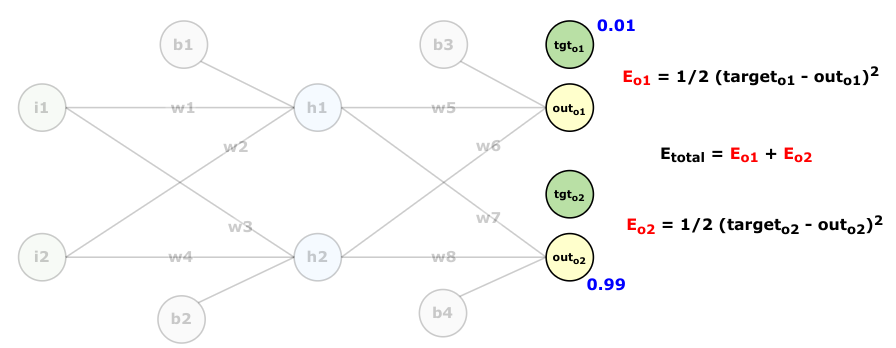

In [14]:
# model has two expected outputs [target_o1, target_o2]
targets = np.array([[0.01, .99]])  # shape: [1, 2]

<h2>
$$ E_{o1}=\frac{1}{2}(target_{o1}-out_{o1})^2 $$
<br>
$$ E_{o2}=\frac{1}{2}(target_{o2}-out_{o2})^2 $$
<br>
$$ E_{total}=E_{o1}+E_{o2} $$
</h2>

In [15]:
def calculate_loss(targets, outputs):
  """
  Calculate error between targets and outputs.
  
  Args:
    targets: Expected outputs having shape of [1, 2]
    predictions: Output of model having shape of [1, 2]
  Returns:
    Sum of Squared Error for each output. Must be a single value.
  """
  loss = np.square(targets - outputs).sum() * 0.5
  return loss

# error between expected and actual output
# total error is the sum of individual errors = o1 + o2
total_error = calculate_loss(targets, out_o)  # shape: [1, 2]
assert np.allclose(total_error, 0.2983711087600027)

## <font color='#264994' face="italic" size="6">Backward pass</font> <hr>


### <font color='#1a996f' face="italic" size="6">Chain Rule</font> <hr>


<h2> 
$$ \frac{\partial{e}}{\partial{d}}=c; \frac{\partial{e}}{\partial{c}}=d; \frac{\partial{e}}{\partial{a}}=c; \frac{\partial{e}}{\partial{b}}=c$$
</h2>




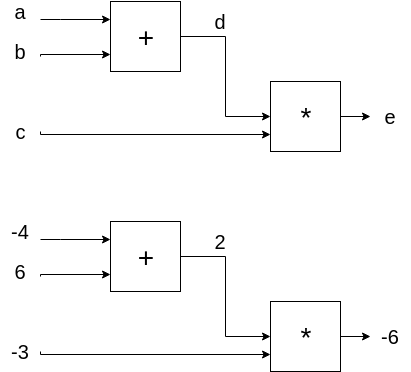

### <font color='#1a996f' face="italic" size="6">Update weights of output layer</font> <hr>


<center>

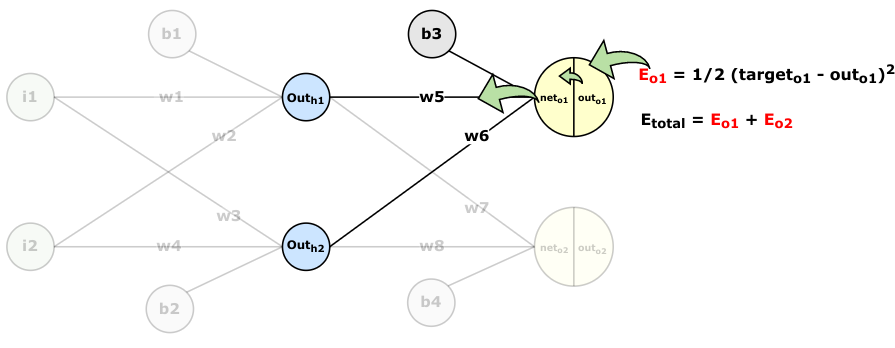

<h2>
$$ \frac{\partial{E_{total}}}{\partial{w_{5}}}=\frac{\partial{E_{total}}}{\partial{out_{o1}}}*\frac{\partial{out_{o1}}}{\partial{net_{o1}}}*\frac{\partial{net_{o1}}}{\partial{w_{5}}} $$
<hr>
$$  \frac{\partial{E_{total}}}{\partial{out_{o1}}}=2*\frac{1}{2}(target_{o1}-out_{o1})^{2-1}*-1+0\\=-(target_{o1}-out_{o1}) $$
<br>
$$  \frac{\partial{out_{o1}}}{\partial{net_{o1}}}=out_{o1}(1-out_{o1}) $$

<center>

[Sigmoid Derivation](https://149695847.v2.pressablecdn.com/wp-content/uploads/2018/01/derivative-sigmoid.jpg)

</center>

<br>
$$  \frac{\partial{net_{o1}}}{\partial{w_{5}}}=out_{h1} $$
<hr>
$$ \frac{\partial{E_{total}}}{\partial{w_{5}}}=-(target_{o1}-out_{o1})*out_{o1}(1-out_{o1})*out_{h1}$$
<hr>
$$ \delta_{o1}=\frac{\partial{E_{total}}}{\partial{out_{o1}}}*\frac{\partial{out_{o1}}}{\partial{net_{o1}}}=\frac{\partial{E_{total}}}{\partial{net_{o1}}} $$
<br>
$$ \delta_{o1}=-(target_{o1}-out_{o1})*out_{o1}(1-out_{o1})$$
$$ \delta_{o2}=-(target_{o2}-out_{o1})*out_{o2}(1-out_{o2})$$
<br>

In [16]:
def calculate_delta_output_layer(targets, out_o):
  """
  Calculates delta for output layer.
  Delta is partial deritvative of total error wrt out

  Args:
    targets: Expected outputs having shape of [1, 2]
    out_o: Output of model having shape of [1, 2]
  Returns:
    Delta which is .
  """
  delta = -(targets - out_o) * out_o * (1 - out_o)
  return delta

# deltas for output layer [delta_o1, delta_o2]
delta_o = calculate_delta_output_layer(targets, out_o)  # shape [1, 2]
assert np.allclose(delta_o, np.array([[ 0.13849856, -0.03809824]]))

<h2>
$$ \frac{\partial{E_{total}}}{\partial{w_{5}}}=\delta_{o1}*out_{h1}$$
$$ \frac{\partial{E_{total}}}{\partial{w_{6}}}=\delta_{o1}*out_{h2}$$
$$ \frac{\partial{E_{total}}}{\partial{w_{7}}}=\delta_{o2}*out_{h1}$$
$$ \frac{\partial{E_{total}}}{\partial{w_{8}}}=\delta_{o2}*out_{h2}$$
<h2>

In [17]:
def calcualte_gradients_of_weights(delta, out):
  """
  Calculates gradients given delta and output.
  gradients are partial derivate of total error wrt weights.

  Args:
    delta: delta array having shape of [1, 2]
    out: output array having shape of [1, 2]
  Returns:
    gradients of weights.
  """
  grads = np.dot(delta.T , out)
  return grads

# gradients for weights of output layer [del_error_del_w5, del_error_del_w6,
#                                        del_error_del_w7, del_errro_del_w8]
grads_weights_out =  calcualte_gradients_of_weights(delta_o, out_h)  # shape [2, 2]
assert np.allclose(grads_weights_out, np.array([[ 0.08216704,  0.08266763], [-0.02260254, -0.02274024]]))

<h2>
$$ w_5^+ = w_5 - \eta*\frac{\partial{E_{total}}}{\partial{w_{5}}} $$
$$ w_6^+ = w_6 - \eta*\frac{\partial{E_{total}}}{\partial{w_{6}}} $$
$$ w_7^+ = w_7 - \eta*\frac{\partial{E_{total}}}{\partial{w_{7}}} $$
$$ w_8^+ = w_8 - \eta*\frac{\partial{E_{total}}}{\partial{w_{8}}} $$
</h2>

In [18]:
def update_params(params, gradients, lr=0.5):
  """
  Calculate params given old params and gradients.
  
  Args:
    params: current params having shape of [2, 2]
    gradients: gradient of weights having shape of [2, 2]
    lr: learning rate
  Returns:
    updated params. Shape must be [2, 2]
  """
  params_new = params - lr * gradients
  return params_new


# update weights of output layer
new_weights_output_layer = update_params(weights_output_layer, grads_weights_out)  # shape [2, 2]
assert np.allclose(new_weights_output_layer, np.array([[0.35891648, 0.40866619], [0.51130127, 0.56137012]]))

### <font color='#1a996f' face="italic" size="6">Update biases of output layer</font> <hr>


<center>

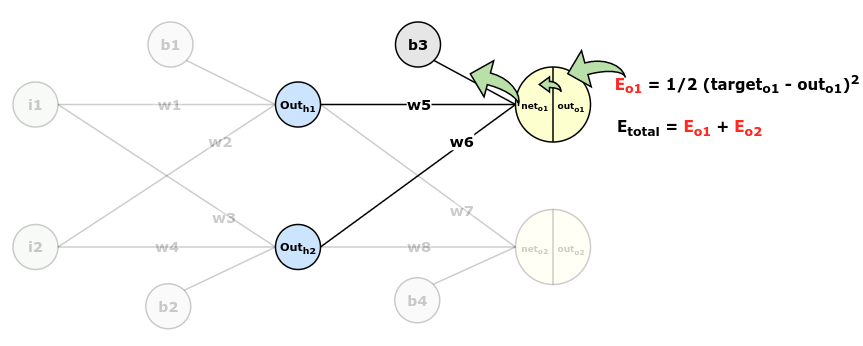


<h2>
$$ \frac{\partial{E_{total}}}{\partial{b_{3}}}=\frac{\partial{E_{total}}}{\partial{out_{o1}}}*\frac{\partial{out_{o1}}}{\partial{net_{o1}}}*\frac{\partial{net_{o1}}}{\partial{b_{3}}}=\delta_{o1}*1=\delta_{o1}$$
<br>
$$ \frac{\partial{E_{total}}}{\partial{b_{4}}}=\frac{\partial{E_{total}}}{\partial{out_{o2}}}*\frac{\partial{out_{o2}}}{\partial{net_{o2}}}*\frac{\partial{net_{o2}}}{\partial{b_{3}}}=\delta_{o2}*1=\delta_{o2}$$
<h2>

<hr>

<h2>
$$ b_3^+ = b_3 - \eta*\frac{\partial{E_{total}}}{\partial{b_{3}}} = b_3 - \eta*\delta_{o1} $$
<br>
$$ b_4^+ = b_4 - \eta*\frac{\partial{E_{total}}}{\partial{b_{4}}} = b_4 - \eta*\delta_{o2} $$
</h2>

In [19]:
# update biases of output layer
new_biases_output_layer = update_params(biases_output_layer, delta_o)  # shape [1, 2]
assert np.allclose(new_biases_output_layer, np.array([[0.53075072, 0.61904912]]))

### <font color='#1a996f' face="italic" size="6">Update weights of hidden layer</font> <hr>


<center>

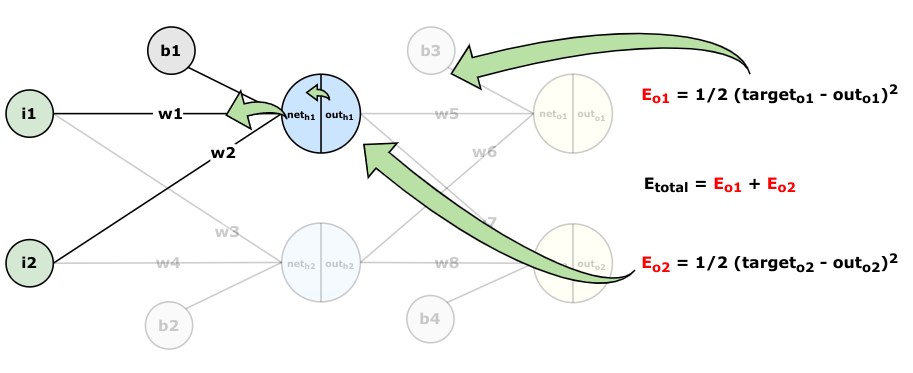

<h2>
$$ \frac{\partial{E_{total}}}{\partial{w_{1}}}=\frac{\partial{E_{total}}}{\partial{out_{h1}}}*\frac{\partial{out_{h1}}}{\partial{net_{h1}}}*\frac{\partial{net_{h1}}}{\partial{w_{1}}} $$
<hr>
<br>
$$ \frac{\partial{E_{total}}}{\partial{out_{h1}}}=\sum_{o}\frac{\partial{E_{total}}}{\partial{out_{o}}}*\frac{\partial{out_{o}}}{\partial{net_{o}}}
*\frac{\partial{net_{o}}}{\partial{out_{h1}}}\\=\sum_{o}\delta_{o}*w_{ho}$$
<br>
$$  \frac{\partial{out_{h1}}}{\partial{net_{h1}}}=out_{h1}(1-out_{h1}) $$
<br>
$$  \frac{\partial{net_{h1}}}{\partial{w_{1}}}=i_{1} $$
<hr>
$$ \frac{\partial{E_{total}}}{\partial{w_{1}}}=(\sum_{o}\delta_{o}*w_{ho})*out_{h1}(1-out_{h1})*i_{1} $$
<hr>
$$ \delta_{h1}=(\sum_{o}\delta_{o}*w_{ho})*out_{h1}(1-out_{h1})$$
$$ \delta_{h2}=(\sum_{o}\delta_{o}*w_{ho})*out_{h2}(1-out_{h2})$$
</h2>



In [20]:
def calculate_delta_hidden_layer(delta_o, weights_o, out_h):
  """
  Calculates delta for hidden layer.
  Delta is partial deritvative of total error wrt hidden layer weights

  Args:
    targets: Expected outputs having shape of [1, 2]
    out_o: Output of model having shape of [1, 2]
  Returns:
    Delta which is .
  """
  delta = (delta_o * weights_o.T).sum(axis=1) * out_h * (1 - out_h)
  return delta

# deltas for output layer [delta_h1, delta_h2]
delta_h = calculate_delta_hidden_layer(delta_o, weights_output_layer, out_h)  # shape [1, 2]
assert np.allclose(delta_h, np.array([[0.00877135, 0.00995425]]))

<h2>
$$ \frac{\partial{E_{total}}}{\partial{w_{1}}}=\delta_{h1}*i_{1} $$
$$ \frac{\partial{E_{total}}}{\partial{w_{2}}}=\delta_{h1}*i_{2} $$
$$ \frac{\partial{E_{total}}}{\partial{w_{3}}}=\delta_{h2}*i_{1} $$
$$ \frac{\partial{E_{total}}}{\partial{w_{4}}}=\delta_{h2}*i_{2} $$
<h2>


In [21]:
# gradients for weights of hidden layer [del_error_del_w1, del_error_del_w2, del_error_del_w3, del_errro_del_w4]
grads_weights_hidden = calcualte_gradients_of_weights(delta_h, inputs) # shape [2, 2]
assert np.allclose(grads_weights_hidden, np.array([[0.00043857, 0.00087714],[0.00049771, 0.00099543]]))

<h2>
$$ w_{1..4}^+ = w_{1..4} - \eta*\frac{\partial{E_{total}}}{\partial{w_{1..4}}}$$
</h2>

In [22]:
# update rule : new_weight = old_weight - constant_lr * del_total_del_weight
new_weights_hidden_layer = update_params(weights_hidden_layer, grads_weights_hidden)
assert np.allclose(new_weights_hidden_layer, np.array([[0.14978072, 0.19956143], [0.24975114, 0.29950229]]))

<h2>
$$ \frac{\partial{E_{total}}}{\partial{b_{1}}}=\delta_{h1} $$
</br>
$$ \frac{\partial{E_{total}}}{\partial{b_{2}}}=\delta_{h2} $$
<hr>
$$ b_{1,2}^+ = b_{1,2} - \eta*\frac{\partial{E_{total}}}{\partial{w_{1,2}}}$$
</h2>


In [23]:

# update rule : new_bias = old_bias - constant_lr * del_total_del_bias
new_bias_hidden_layer = update_params(biases_hidden_layer, delta_h)
assert np.allclose(new_bias_hidden_layer, np.array([[0.34561432, 0.34502287]]))

## <font color='#264994' face="italic" size="6">Training loop</font> <hr>


In [24]:
import numpy as np

def training_loop():
  # model takes two inputs [i1, i2]
  inputs = np.array([[0.05, .10]])  # shape: [1, 2]
  targets = np.array([[0.01, .99]])  # shape: [1, 2]


  # hidden layer weights [w1, w2]
  #                      [w3, w4]
  weights_hidden_layer = np.array([[0.15, 0.20],
                                  [0.25, 0.30]])  # shape: [2, 2]

  # bias for hidden layer [b1, b2]
  biases_hidden_layer = np.array([[0.35, 0.35]])  # shape: [1, 2]

  # output layer weights [w5, w6]
  #                      [w7, w8]
  weights_output_layer = np.array([[0.40, 0.45], [0.50, 0.55]])  # shape: [2, 2]

  # bias for output layer
  biases_output_layer = np.array([[0.60, 0.60]])   # shape: [1, 2] 

  for i in range(500):
    # forward pass
    net_h = net_output(inputs, weights_hidden_layer, biases_hidden_layer)  # shape [1, 2]
    out_h = sigmoid(net_h)  # shape: [1, 2]
    
    net_o = net_output(out_h, weights_output_layer, biases_output_layer)  # shape: [1, 2] 
    out_o = sigmoid(net_o)  # shape: [1, 2]
    
    total_error = calculate_loss(targets, out_o)  # shape: [1, 2]
    if (i+1)%50 == 0 or i==0:
      print(f"iter {i+1:>5} | total_error {total_error:<25} | prediction = {out_o.flatten()}")

    # backward pass
    delta_o = calculate_delta_output_layer(targets, out_o)  # shape [1, 2]
    grads_weights_out =  calcualte_gradients_of_weights(delta_o, out_h)  # shape [2, 2]
    new_weights_output_layer = update_params(weights_output_layer, grads_weights_out)  # shape [2, 2]
    new_biases_output_layer = update_params(biases_output_layer, delta_o)  # shape [1, 2]

    delta_h = calculate_delta_hidden_layer(delta_o, weights_output_layer, out_h)  # shape [1, 2]
    grads_weights_hidden = calcualte_gradients_of_weights(delta_h, inputs) # shape [2, 2]
    new_weights_hidden_layer = update_params(weights_hidden_layer, grads_weights_hidden)
    new_bias_hidden_layer = update_params(biases_hidden_layer, delta_h)

    # update params
    weights_hidden_layer = new_weights_hidden_layer
    biases_output_layer = new_bias_hidden_layer
    weights_output_layer = new_weights_output_layer
    biases_output_layer = new_biases_output_layer
  
training_loop()

iter     1 | total_error 0.2983711087600027        | prediction = [0.75136507 0.77292847]
iter    50 | total_error 0.01611925355615781       | prediction = [0.15588608 0.88533024]
iter   100 | total_error 0.006755316401228874      | prediction = [0.09893324 0.91515676]
iter   150 | total_error 0.004108040563398002      | prediction = [0.07771712 0.9297466 ]
iter   200 | total_error 0.0028862952171530053     | prediction = [0.06604756 0.93870418]
iter   250 | total_error 0.0021919276550905337     | prediction = [0.05846226 0.9448861 ]
iter   300 | total_error 0.0017479093721360348     | prediction = [0.05304723 0.94946909]
iter   350 | total_error 0.001441428831906417      | prediction = [0.04894177 0.95303521]
iter   400 | total_error 0.0012182076720778862     | prediction = [0.04569591 0.95590869]
iter   450 | total_error 0.0010490123238802872     | prediction = [0.04304912 0.95828597]
iter   500 | total_error 0.0009167549720297469     | prediction = [0.04083906 0.96029374]
